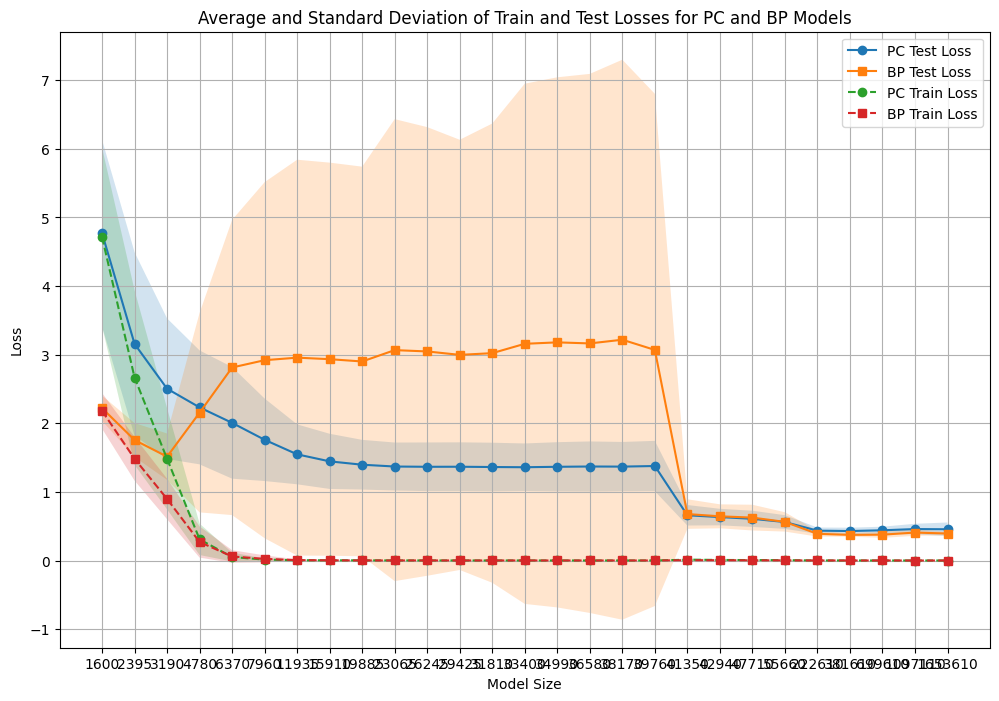

In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

def load_losses_from_files(directory, keyword):
    files = [f for f in os.listdir(directory) if keyword in f and f.endswith('.json')]
    all_test_losses = {}
    all_train_losses = {}

    for file in files:
        with open(os.path.join(directory, file), 'r') as f:
            data = json.load(f)
            for model_size, test_loss in data["Test losses"].items():
                if model_size not in all_test_losses:
                    all_test_losses[model_size] = []
                all_test_losses[model_size].append(test_loss)

            for model_size, train_loss_list in data["Train losses"].items():
                if model_size not in all_train_losses:
                    all_train_losses[model_size] = []
                all_train_losses[model_size].append(train_loss_list[-1])

    return all_test_losses, all_train_losses

def compute_mean_and_std(losses):
    mean_losses = {}
    std_losses = {}

    for model_size, loss_list in losses.items():
        mean_losses[model_size] = np.mean(loss_list)
        std_losses[model_size] = np.std(loss_list)

    return mean_losses, std_losses

def plot_losses(mean_losses_pc, std_losses_pc, mean_losses_bp, std_losses_bp, mean_train_losses_pc, std_train_losses_pc, mean_train_losses_bp, std_train_losses_bp):
    model_sizes_pc = sorted(mean_losses_pc.keys(), key=int)
    model_sizes_bp = sorted(mean_losses_bp.keys(), key=int)

    mean_test_pc = [mean_losses_pc[size] for size in model_sizes_pc]
    std_test_pc = [std_losses_pc[size] for size in model_sizes_pc]

    mean_test_bp = [mean_losses_bp[size] for size in model_sizes_bp]
    std_test_bp = [std_losses_bp[size] for size in model_sizes_bp]

    mean_train_pc = [mean_train_losses_pc[size] for size in model_sizes_pc]
    std_train_pc = [std_train_losses_pc[size] for size in model_sizes_pc]

    mean_train_bp = [mean_train_losses_bp[size] for size in model_sizes_bp]
    std_train_bp = [std_train_losses_bp[size] for size in model_sizes_bp]

    plt.figure(figsize=(12, 8))

    plt.plot(model_sizes_pc, mean_test_pc, label='PC Test Loss', linestyle='-', marker='o')
    plt.fill_between(model_sizes_pc, np.array(mean_test_pc) - np.array(std_test_pc), np.array(mean_test_pc) + np.array(std_test_pc), alpha=0.2)

    plt.plot(model_sizes_bp, mean_test_bp, label='BP Test Loss', linestyle='-', marker='s')
    plt.fill_between(model_sizes_bp, np.array(mean_test_bp) - np.array(std_test_bp), np.array(mean_test_bp) + np.array(std_test_bp), alpha=0.2)

    plt.plot(model_sizes_pc, mean_train_pc, label='PC Train Loss', linestyle='--', marker='o')
    plt.fill_between(model_sizes_pc, np.array(mean_train_pc) - np.array(std_train_pc), np.array(mean_train_pc) + np.array(std_train_pc), alpha=0.2)

    plt.plot(model_sizes_bp, mean_train_bp, label='BP Train Loss', linestyle='--', marker='s')
    plt.fill_between(model_sizes_bp, np.array(mean_train_bp) - np.array(std_train_bp), np.array(mean_train_bp) + np.array(std_train_bp), alpha=0.2)

    plt.xlabel('Model Size')
    plt.ylabel('Loss')
    plt.title('Average and Standard Deviation of Train and Test Losses for PC and BP Models')
    plt.legend()
    plt.grid(True)
    plt.show()

# Paths to the directories containing the JSON files
dir_pc = 'data/results_pc/two_layer_nn/CrossEntropyLoss/'
dir_bp = 'data/results_bp/two_layer_nn/CrossEntropyLoss/'

# Load losses from files
test_losses_pc, train_losses_pc = load_losses_from_files(dir_pc, 'noise_0.0')
test_losses_bp, train_losses_bp = load_losses_from_files(dir_bp, 'noise_0.0')

# Compute mean and standard deviation for test losses
mean_test_losses_pc, std_test_losses_pc = compute_mean_and_std(test_losses_pc)
mean_test_losses_bp, std_test_losses_bp = compute_mean_and_std(test_losses_bp)

# Compute mean and standard deviation for train losses
mean_train_losses_pc, std_train_losses_pc = compute_mean_and_std(train_losses_pc)
mean_train_losses_bp, std_train_losses_bp = compute_mean_and_std(train_losses_bp)

# Plot the losses
plot_losses(mean_test_losses_pc, std_test_losses_pc, mean_test_losses_bp, std_test_losses_bp, mean_train_losses_pc, std_train_losses_pc, mean_train_losses_bp, std_train_losses_bp)


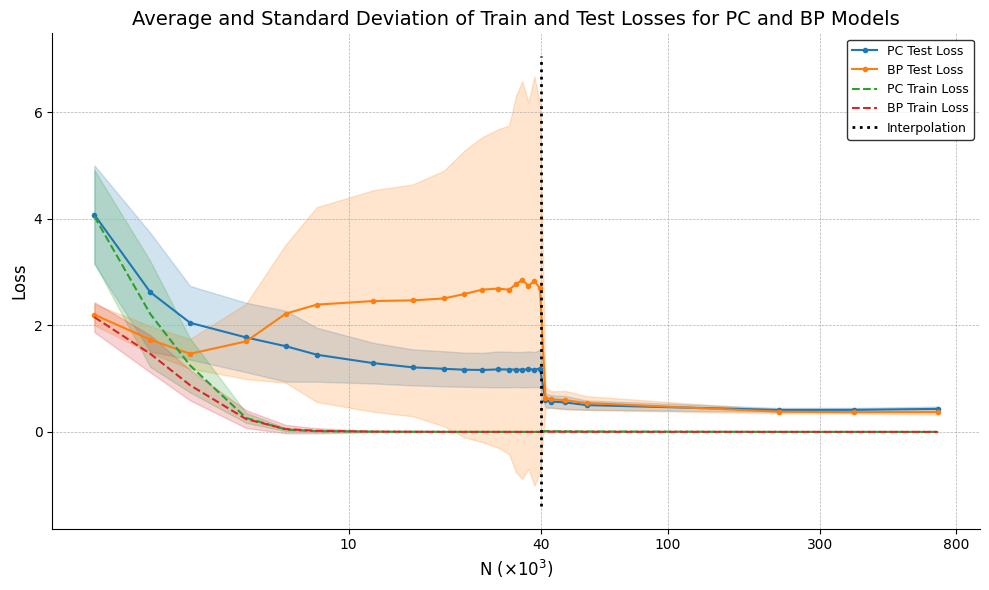

In [8]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def load_losses_from_files(directory, keyword):
    files = [f for f in os.listdir(directory) if keyword in f and f.endswith('.json') and not (f.startswith("epochs_1000_") or f.startswith("epochs_500_"))]
    all_test_losses = {}
    all_train_losses = {}

    for file in files:
        with open(os.path.join(directory, file), 'r') as f:
            data = json.load(f)
            for model_size, test_loss in data["Test losses"].items():
                if model_size not in all_test_losses:
                    all_test_losses[model_size] = []
                all_test_losses[model_size].append(test_loss)

            for model_size, train_loss_list in data["Train losses"].items():
                if model_size not in all_train_losses:
                    all_train_losses[model_size] = []
                all_train_losses[model_size].append(train_loss_list[-1])

    return all_test_losses, all_train_losses

def compute_mean_and_std(losses):
    mean_losses = {}
    std_losses = {}

    for model_size, loss_list in losses.items():
        mean_losses[model_size] = np.mean(loss_list)
        std_losses[model_size] = np.std(loss_list)

    return mean_losses, std_losses

def plot_losses(mean_losses_pc, std_losses_pc, mean_losses_bp, std_losses_bp, mean_train_losses_pc, std_train_losses_pc, mean_train_losses_bp, std_train_losses_bp):
    model_sizes_pc = sorted(mean_losses_pc.keys(), key=int)
    model_sizes_bp = sorted(mean_losses_bp.keys(), key=int)

    mean_test_pc = [mean_losses_pc[size] for size in model_sizes_pc]
    std_test_pc = [std_losses_pc[size] for size in model_sizes_pc]

    mean_test_bp = [mean_losses_bp[size] for size in model_sizes_bp]
    std_test_bp = [std_losses_bp[size] for size in model_sizes_bp]

    mean_train_pc = [mean_train_losses_pc[size] for size in model_sizes_pc]
    std_train_pc = [std_train_losses_pc[size] for size in model_sizes_pc]

    mean_train_bp = [mean_train_losses_bp[size] for size in model_sizes_bp]
    std_train_bp = [std_train_losses_bp[size] for size in model_sizes_bp]

    sizes_pc = [int(size) / 1e3 for size in model_sizes_pc]
    sizes_bp = [int(size) / 1e3 for size in model_sizes_bp]
    interpolation_threshold = 40

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.semilogx(sizes_pc, mean_test_pc, ".-", label="PC Test Loss", color="C0")
    ax.fill_between(sizes_pc, np.array(mean_test_pc) - np.array(std_test_pc), np.array(mean_test_pc) + np.array(std_test_pc), alpha=0.2, color="C0")

    ax.semilogx(sizes_bp, mean_test_bp, ".-", label="BP Test Loss", color="C1")
    ax.fill_between(sizes_bp, np.array(mean_test_bp) - np.array(std_test_bp), np.array(mean_test_bp) + np.array(std_test_bp), alpha=0.2, color="C1")

    ax.semilogx(sizes_pc, mean_train_pc, "--", label="PC Train Loss", color="C2")
    ax.fill_between(sizes_pc, np.array(mean_train_pc) - np.array(std_train_pc), np.array(mean_train_pc) + np.array(std_train_pc), alpha=0.2, color="C2")

    ax.semilogx(sizes_bp, mean_train_bp, "--", label="BP Train Loss", color="C3")
    ax.fill_between(sizes_bp, np.array(mean_train_bp) - np.array(std_train_bp), np.array(mean_train_bp) + np.array(std_train_bp), alpha=0.2, color="C3")

    ax.set_xticks([10, 40, 100, 300, 800], minor=False)
    ax.set_xticks([], minor=True)
    ax.vlines(interpolation_threshold, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], linestyle="dotted", color="black", linewidth=2, label="Interpolation")

    ax.set_facecolor("white")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color("black")
    ax.spines["bottom"].set_color("black")
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.xaxis.get_major_formatter().set_scientific(False)
    ax.xaxis.get_major_formatter().set_useOffset(False)
    ax.tick_params(axis='x', colors="black")
    ax.tick_params(axis='y', colors="black")
    ax.yaxis.label.set_color("black")
    ax.xaxis.label.set_color("black")

    plt.xlabel(r"N $(\times 10^3)$", color="black", fontsize=12)
    plt.ylabel("Loss", color="black", fontsize=12)
    plt.title("Average and Standard Deviation of Train and Test Losses for PC and BP Models", color="black", fontsize=14)
    legend = ax.legend(frameon=True, fontsize=9, loc='best', edgecolor='black')
    plt.setp(legend.get_texts(), color="black")
    fig.tight_layout()
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)
    plt.show()

# Paths to the directories containing the JSON files
dir_pc = 'data/results_pc/two_layer_nn/CrossEntropyLoss/'
dir_bp = 'data/results_bp/two_layer_nn/CrossEntropyLoss/'

# Load losses from files
test_losses_pc, train_losses_pc = load_losses_from_files(dir_pc, 'noise_0.0')
test_losses_bp, train_losses_bp = load_losses_from_files(dir_bp, 'noise_0.0')

# Compute mean and standard deviation for test losses
mean_test_losses_pc, std_test_losses_pc = compute_mean_and_std(test_losses_pc)
mean_test_losses_bp, std_test_losses_bp = compute_mean_and_std(test_losses_bp)

# Compute mean and standard deviation for train losses
mean_train_losses_pc, std_train_losses_pc = compute_mean_and_std(train_losses_pc)
mean_train_losses_bp, std_train_losses_bp = compute_mean_and_std(train_losses_bp)

# Plot the losses
plot_losses(mean_test_losses_pc, std_test_losses_pc, mean_test_losses_bp, std_test_losses_bp, mean_train_losses_pc, std_train_losses_pc, mean_train_losses_bp, std_train_losses_bp)


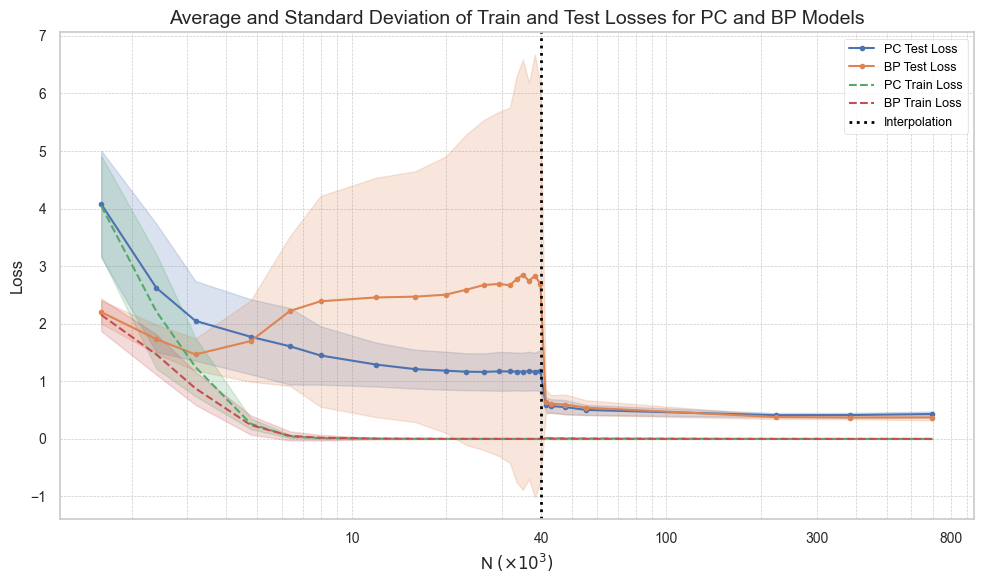

In [9]:
import os
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def load_losses_from_files(directory, keyword):
    files = [f for f in os.listdir(directory) if keyword in f and f.endswith('.json') and not (f.startswith("epochs_1000_") or f.startswith("epochs_500_"))]
    all_test_losses = {}
    all_train_losses = {}

    for file in files:
        with open(os.path.join(directory, file), 'r') as f:
            data = json.load(f)
            for model_size, test_loss in data["Test losses"].items():
                if model_size not in all_test_losses:
                    all_test_losses[model_size] = []
                all_test_losses[model_size].append(test_loss)

            for model_size, train_loss_list in data["Train losses"].items():
                if model_size not in all_train_losses:
                    all_train_losses[model_size] = []
                all_train_losses[model_size].append(train_loss_list[-1])

    return all_test_losses, all_train_losses

def compute_mean_and_std(losses):
    mean_losses = {}
    std_losses = {}

    for model_size, loss_list in losses.items():
        mean_losses[model_size] = np.mean(loss_list)
        std_losses[model_size] = np.std(loss_list)

    return mean_losses, std_losses

def plot_losses(mean_losses_pc, std_losses_pc, mean_losses_bp, std_losses_bp, mean_train_losses_pc, std_train_losses_pc, mean_train_losses_bp, std_train_losses_bp):
    model_sizes_pc = sorted(mean_losses_pc.keys(), key=int)
    model_sizes_bp = sorted(mean_losses_bp.keys(), key=int)

    mean_test_pc = [mean_losses_pc[size] for size in model_sizes_pc]
    std_test_pc = [std_losses_pc[size] for size in model_sizes_pc]

    mean_test_bp = [mean_losses_bp[size] for size in model_sizes_bp]
    std_test_bp = [std_losses_bp[size] for size in model_sizes_bp]

    mean_train_pc = [mean_train_losses_pc[size] for size in model_sizes_pc]
    std_train_pc = [std_train_losses_pc[size] for size in model_sizes_pc]

    mean_train_bp = [mean_train_losses_bp[size] for size in model_sizes_bp]
    std_train_bp = [std_train_losses_bp[size] for size in model_sizes_bp]

    sizes_pc = [int(size) / 1e3 for size in model_sizes_pc]
    sizes_bp = [int(size) / 1e3 for size in model_sizes_bp]
    interpolation_threshold = 40

    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    plt.semilogx(sizes_pc, mean_test_pc, ".-", label="PC Test Loss", color="C0")
    plt.fill_between(sizes_pc, np.array(mean_test_pc) - np.array(std_test_pc), np.array(mean_test_pc) + np.array(std_test_pc), alpha=0.2, color="C0")

    plt.semilogx(sizes_bp, mean_test_bp, ".-", label="BP Test Loss", color="C1")
    plt.fill_between(sizes_bp, np.array(mean_test_bp) - np.array(std_test_bp), np.array(mean_test_bp) + np.array(std_test_bp), alpha=0.2, color="C1")

    plt.semilogx(sizes_pc, mean_train_pc, "--", label="PC Train Loss", color="C2")
    plt.fill_between(sizes_pc, np.array(mean_train_pc) - np.array(std_train_pc), np.array(mean_train_pc) + np.array(std_train_pc), alpha=0.2, color="C2")

    plt.semilogx(sizes_bp, mean_train_bp, "--", label="BP Train Loss", color="C3")
    plt.fill_between(sizes_bp, np.array(mean_train_bp) - np.array(std_train_bp), np.array(mean_train_bp) + np.array(std_train_bp), alpha=0.2, color="C3")

    plt.axvline(x=interpolation_threshold, ymin=0, ymax=1, linestyle="dotted", color="black", linewidth=2, label="Interpolation")

    plt.xlabel(r"N $(\times 10^3)$", fontsize=12)
    plt.ylabel("Loss", fontsize=12)
    plt.title("Average and Standard Deviation of Train and Test Losses for PC and BP Models", fontsize=14)
    
    legend = plt.legend(frameon=True, fontsize=9, loc='best', edgecolor='lightgrey')
    plt.setp(legend.get_texts(), color="black")
    legend.get_frame().set_linewidth(0.5)
    legend.get_frame().set_alpha(0.8)

    plt.xticks([10, 40, 100, 300, 800], fontsize=10)
    plt.yticks(fontsize=10)
    plt.gca().xaxis.set_major_formatter(mticker.ScalarFormatter())
    plt.gca().xaxis.get_major_formatter().set_scientific(False)
    plt.gca().xaxis.get_major_formatter().set_useOffset(False)
    
    plt.tight_layout()
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)
    plt.show()

# Paths to the directories containing the JSON files
dir_pc = 'data/results_pc/two_layer_nn/CrossEntropyLoss/'
dir_bp = 'data/results_bp/two_layer_nn/CrossEntropyLoss/'

# Load losses from files
test_losses_pc, train_losses_pc = load_losses_from_files(dir_pc, 'noise_0.0')
test_losses_bp, train_losses_bp = load_losses_from_files(dir_bp, 'noise_0.0')

# Compute mean and standard deviation for test losses
mean_test_losses_pc, std_test_losses_pc = compute_mean_and_std(test_losses_pc)
mean_test_losses_bp, std_test_losses_bp = compute_mean_and_std(test_losses_bp)

# Compute mean and standard deviation for train losses
mean_train_losses_pc, std_train_losses_pc = compute_mean_and_std(train_losses_pc)
mean_train_losses_bp, std_train_losses_bp = compute_mean_and_std(train_losses_bp)

# Plot the losses
plot_losses(mean_test_losses_pc, std_test_losses_pc, mean_test_losses_bp, std_test_losses_bp, mean_train_losses_pc, std_train_losses_pc, mean_train_losses_bp, std_train_losses_bp)


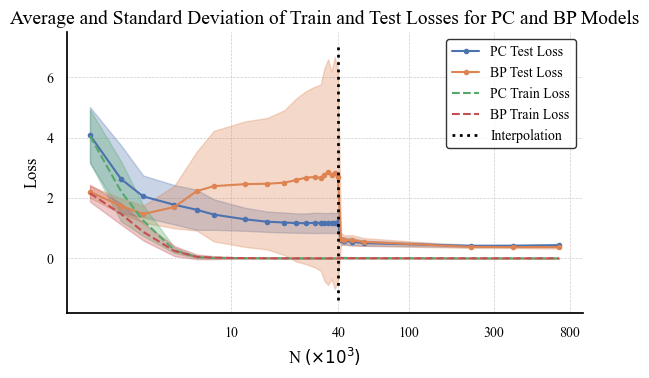

In [11]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def load_losses_from_files(directory, keyword):
    files = [f for f in os.listdir(directory) if keyword in f and f.endswith('.json') and not (f.startswith("epochs_1000_") or f.startswith("epochs_500_"))]
    all_test_losses = {}
    all_train_losses = {}

    for file in files:
        with open(os.path.join(directory, file), 'r') as f:
            data = json.load(f)
            for model_size, test_loss in data["Test losses"].items():
                if model_size not in all_test_losses:
                    all_test_losses[model_size] = []
                all_test_losses[model_size].append(test_loss)

            for model_size, train_loss_list in data["Train losses"].items():
                if model_size not in all_train_losses:
                    all_train_losses[model_size] = []
                all_train_losses[model_size].append(train_loss_list[-1])

    return all_test_losses, all_train_losses

def compute_mean_and_std(losses):
    mean_losses = {}
    std_losses = {}

    for model_size, loss_list in losses.items():
        mean_losses[model_size] = np.mean(loss_list)
        std_losses[model_size] = np.std(loss_list)

    return mean_losses, std_losses

def plot_losses(mean_losses_pc, std_losses_pc, mean_losses_bp, std_losses_bp, mean_train_losses_pc, std_train_losses_pc, mean_train_losses_bp, std_train_losses_bp):
    model_sizes_pc = sorted(mean_losses_pc.keys(), key=int)
    model_sizes_bp = sorted(mean_losses_bp.keys(), key=int)

    mean_test_pc = [mean_losses_pc[size] for size in model_sizes_pc]
    std_test_pc = [std_losses_pc[size] for size in model_sizes_pc]

    mean_test_bp = [mean_losses_bp[size] for size in model_sizes_bp]
    std_test_bp = [std_losses_bp[size] for size in model_sizes_bp]

    mean_train_pc = [mean_train_losses_pc[size] for size in model_sizes_pc]
    std_train_pc = [std_train_losses_pc[size] for size in model_sizes_pc]

    mean_train_bp = [mean_train_losses_bp[size] for size in model_sizes_bp]
    std_train_bp = [std_train_losses_bp[size] for size in model_sizes_bp]

    sizes_pc = [int(size) / 1e3 for size in model_sizes_pc]
    sizes_bp = [int(size) / 1e3 for size in model_sizes_bp]
    interpolation_threshold = 40

    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': ['Times New Roman'],
        'axes.titlesize': 14,
        'axes.labelsize': 12,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'legend.fontsize': 10
    })

    fig, ax = plt.subplots(figsize=(6, 4))

    ax.semilogx(sizes_pc, mean_test_pc, ".-", label="PC Test Loss", color="C0")
    ax.fill_between(sizes_pc, np.array(mean_test_pc) - np.array(std_test_pc), np.array(mean_test_pc) + np.array(std_test_pc), alpha=0.3, color="C0")

    ax.semilogx(sizes_bp, mean_test_bp, ".-", label="BP Test Loss", color="C1")
    ax.fill_between(sizes_bp, np.array(mean_test_bp) - np.array(std_test_bp), np.array(mean_test_bp) + np.array(std_test_bp), alpha=0.3, color="C1")

    ax.semilogx(sizes_pc, mean_train_pc, "--", label="PC Train Loss", color="C2")
    ax.fill_between(sizes_pc, np.array(mean_train_pc) - np.array(std_train_pc), np.array(mean_train_pc) + np.array(std_train_pc), alpha=0.3, color="C2")

    ax.semilogx(sizes_bp, mean_train_bp, "--", label="BP Train Loss", color="C3")
    ax.fill_between(sizes_bp, np.array(mean_train_bp) - np.array(std_train_bp), np.array(mean_train_bp) + np.array(std_train_bp), alpha=0.3, color="C3")

    ax.set_xticks([10, 40, 100, 300, 800], minor=False)
    ax.set_xticks([], minor=True)
    ax.vlines(interpolation_threshold, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], linestyle="dotted", color="black", linewidth=2, label="Interpolation")

    ax.set_facecolor("white")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color("black")
    ax.spines["bottom"].set_color("black")
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.xaxis.get_major_formatter().set_scientific(False)
    ax.xaxis.get_major_formatter().set_useOffset(False)
    ax.tick_params(axis='x', colors="black")
    ax.tick_params(axis='y', colors="black")
    ax.yaxis.label.set_color("black")
    ax.xaxis.label.set_color("black")

    plt.xlabel(r"N $(\times 10^3)$", color="black")
    plt.ylabel("Loss", color="black")
    plt.title("Average and Standard Deviation of Train and Test Losses for PC and BP Models", color="black")
    legend = ax.legend(frameon=True, fontsize=10, loc='best', edgecolor='black')
    plt.setp(legend.get_texts(), color="black")
    fig.tight_layout()
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)
    plt.show()

# Paths to the directories containing the JSON files
dir_pc = 'data/results_pc/two_layer_nn/CrossEntropyLoss/'
dir_bp = 'data/results_bp/two_layer_nn/CrossEntropyLoss/'

# Load losses from files
test_losses_pc, train_losses_pc = load_losses_from_files(dir_pc, 'noise_0.0')
test_losses_bp, train_losses_bp = load_losses_from_files(dir_bp, 'noise_0.0')

# Compute mean and standard deviation for test losses
mean_test_losses_pc, std_test_losses_pc = compute_mean_and_std(test_losses_pc)
mean_test_losses_bp, std_test_losses_bp = compute_mean_and_std(test_losses_bp)

# Compute mean and standard deviation for train losses
mean_train_losses_pc, std_train_losses_pc = compute_mean_and_std(train_losses_pc)
mean_train_losses_bp, std_train_losses_bp = compute_mean_and_std(train_losses_bp)

# Plot the losses
plot_losses(mean_test_losses_pc, std_test_losses_pc, mean_test_losses_bp, std_test_losses_bp, mean_train_losses_pc, std_train_losses_pc, mean_train_losses_bp, std_train_losses_bp)


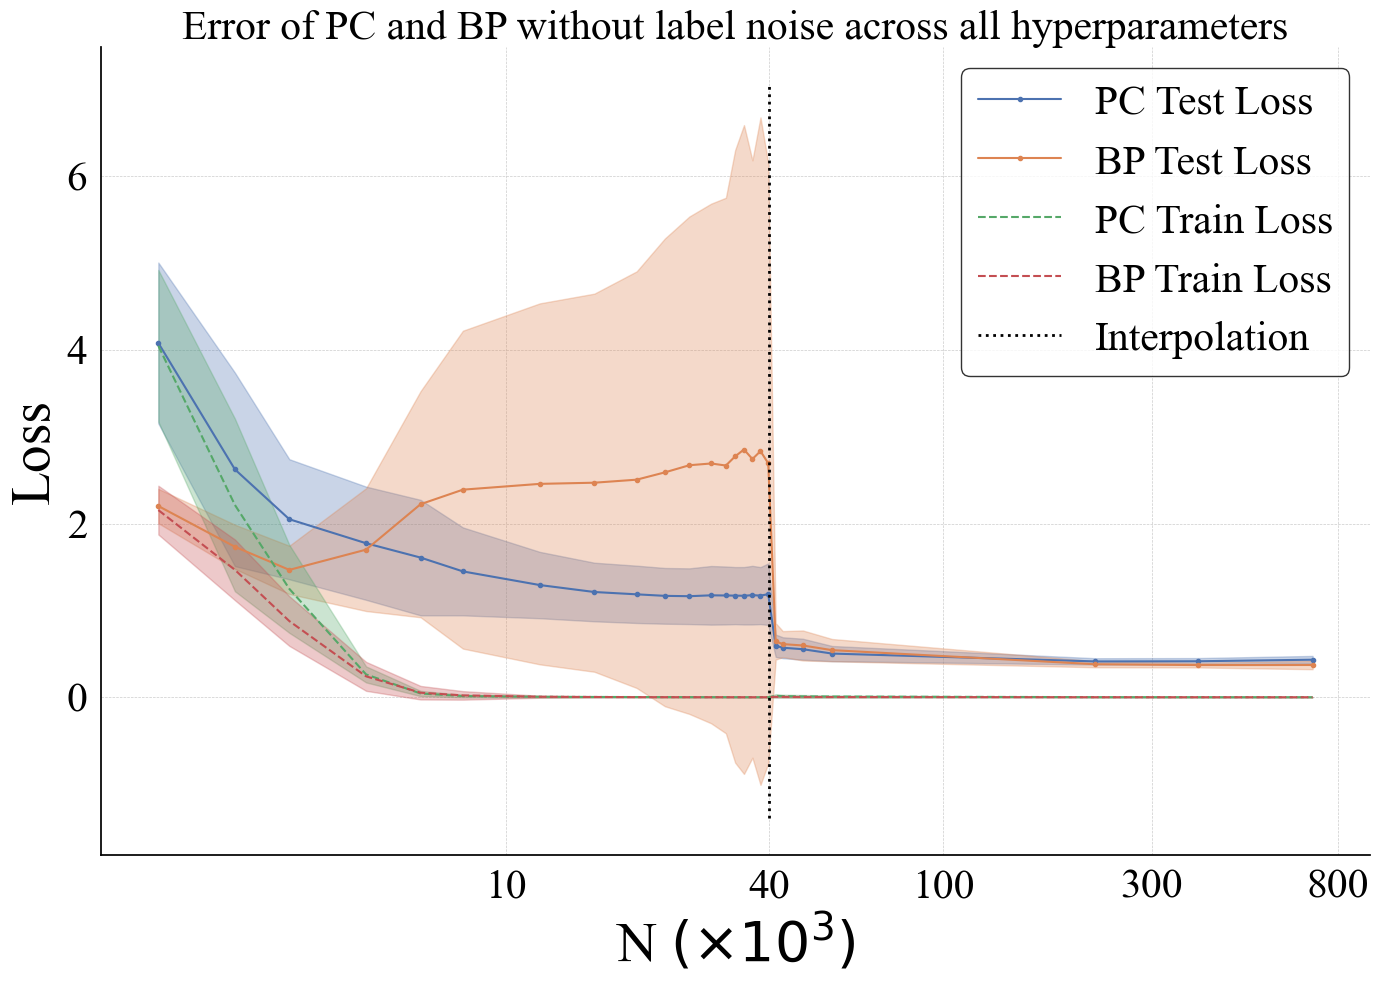

In [70]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def load_losses_from_files(directory, keyword):
    files = [f for f in os.listdir(directory) if keyword in f and f.endswith('.json') and not (f.startswith("epochs_1000_") or f.startswith("epochs_500_"))]
    all_test_losses = {}
    all_train_losses = {}

    for file in files:
        with open(os.path.join(directory, file), 'r') as f:
            data = json.load(f)
            for model_size, test_loss in data["Test losses"].items():
                if model_size not in all_test_losses:
                    all_test_losses[model_size] = []
                all_test_losses[model_size].append(test_loss)

            for model_size, train_loss_list in data["Train losses"].items():
                if model_size not in all_train_losses:
                    all_train_losses[model_size] = []
                all_train_losses[model_size].append(train_loss_list[-1])

    return all_test_losses, all_train_losses

def compute_mean_and_std(losses):
    mean_losses = {}
    std_losses = {}

    for model_size, loss_list in losses.items():
        mean_losses[model_size] = np.mean(loss_list)
        std_losses[model_size] = np.std(loss_list)

    return mean_losses, std_losses

def plot_losses(mean_losses_pc, std_losses_pc, mean_losses_bp, std_losses_bp, mean_train_losses_pc, std_train_losses_pc, mean_train_losses_bp, std_train_losses_bp):
    model_sizes_pc = sorted(mean_losses_pc.keys(), key=int)
    model_sizes_bp = sorted(mean_losses_bp.keys(), key=int)

    mean_test_pc = [mean_losses_pc[size] for size in model_sizes_pc]
    std_test_pc = [std_losses_pc[size] for size in model_sizes_pc]

    mean_test_bp = [mean_losses_bp[size] for size in model_sizes_bp]
    std_test_bp = [std_losses_bp[size] for size in model_sizes_bp]

    mean_train_pc = [mean_train_losses_pc[size] for size in model_sizes_pc]
    std_train_pc = [std_train_losses_pc[size] for size in model_sizes_pc]

    mean_train_bp = [mean_train_losses_bp[size] for size in model_sizes_bp]
    std_train_bp = [std_train_losses_bp[size] for size in model_sizes_bp]

    sizes_pc = [int(size) / 1e3 for size in model_sizes_pc]
    sizes_bp = [int(size) / 1e3 for size in model_sizes_bp]
    interpolation_threshold = 40

    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': ['Times New Roman'],
        'axes.titlesize': 14,
        'axes.labelsize': 12,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'legend.fontsize': 10
    })

    fig, ax = plt.subplots(figsize=(14, 10))

    ax.semilogx(sizes_pc, mean_test_pc, ".-", label="PC Test Loss", color="C0")
    ax.fill_between(sizes_pc, np.array(mean_test_pc) - np.array(std_test_pc), np.array(mean_test_pc) + np.array(std_test_pc), alpha=0.3, color="C0")

    ax.semilogx(sizes_bp, mean_test_bp, ".-", label="BP Test Loss", color="C1")
    ax.fill_between(sizes_bp, np.array(mean_test_bp) - np.array(std_test_bp), np.array(mean_test_bp) + np.array(std_test_bp), alpha=0.3, color="C1")

    ax.semilogx(sizes_pc, mean_train_pc, "--", label="PC Train Loss", color="C2")
    ax.fill_between(sizes_pc, np.array(mean_train_pc) - np.array(std_train_pc), np.array(mean_train_pc) + np.array(std_train_pc), alpha=0.3, color="C2")

    ax.semilogx(sizes_bp, mean_train_bp, "--", label="BP Train Loss", color="C3")
    ax.fill_between(sizes_bp, np.array(mean_train_bp) - np.array(std_train_bp), np.array(mean_train_bp) + np.array(std_train_bp), alpha=0.3, color="C3")

    ax.set_xticks([10, 40, 100, 300, 800], minor=False)
    ax.set_xticks([], minor=True)
    ax.vlines(interpolation_threshold, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], linestyle="dotted", color="black", linewidth=2, label="Interpolation")

    ax.set_facecolor("white")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color("black")
    ax.spines["bottom"].set_color("black")
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.xaxis.get_major_formatter().set_scientific(False)
    ax.xaxis.get_major_formatter().set_useOffset(False)
    ax.tick_params(axis='x', colors="black")
    ax.tick_params(axis='y', colors="black")
    ax.yaxis.label.set_color("black")
    ax.xaxis.label.set_color("black")
    #set size of x and y ticks labels
    ax.xaxis.set_tick_params(labelsize=30)
    ax.yaxis.set_tick_params(labelsize=30)


    plt.xlabel(r"N $(\times 10^3)$", color="black", fontsize=40)
    plt.ylabel("Loss", color="black", fontsize=40)
    plt.title("Error of PC and BP without label noise across all hyperparameters", color="black", fontsize=30)
    legend = ax.legend(frameon=True, fontsize=30, loc='best', edgecolor='black')
    plt.setp(legend.get_texts(), color="black")
    fig.tight_layout()
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)

    # Save the figure
    plt.savefig("test_error_pc_bp_no_noise_all_hyperparameters.pdf", dpi=300, bbox_inches='tight')

    plt.show()


# Paths to the directories containing the JSON files
dir_pc = 'data/results_pc/two_layer_nn/CrossEntropyLoss/'
dir_bp = 'data/results_bp/two_layer_nn/CrossEntropyLoss/'

# Load losses from files
test_losses_pc, train_losses_pc = load_losses_from_files(dir_pc, 'noise_0.0')
test_losses_bp, train_losses_bp = load_losses_from_files(dir_bp, 'noise_0.0')

# Compute mean and standard deviation for test losses
mean_test_losses_pc, std_test_losses_pc = compute_mean_and_std(test_losses_pc)
mean_test_losses_bp, std_test_losses_bp = compute_mean_and_std(test_losses_bp)

# Compute mean and standard deviation for train losses
mean_train_losses_pc, std_train_losses_pc = compute_mean_and_std(train_losses_pc)
mean_train_losses_bp, std_train_losses_bp = compute_mean_and_std(train_losses_bp)

# Plot the losses
plot_losses(mean_test_losses_pc, std_test_losses_pc, mean_test_losses_bp, std_test_losses_bp, mean_train_losses_pc, std_train_losses_pc, mean_train_losses_bp, std_train_losses_bp)


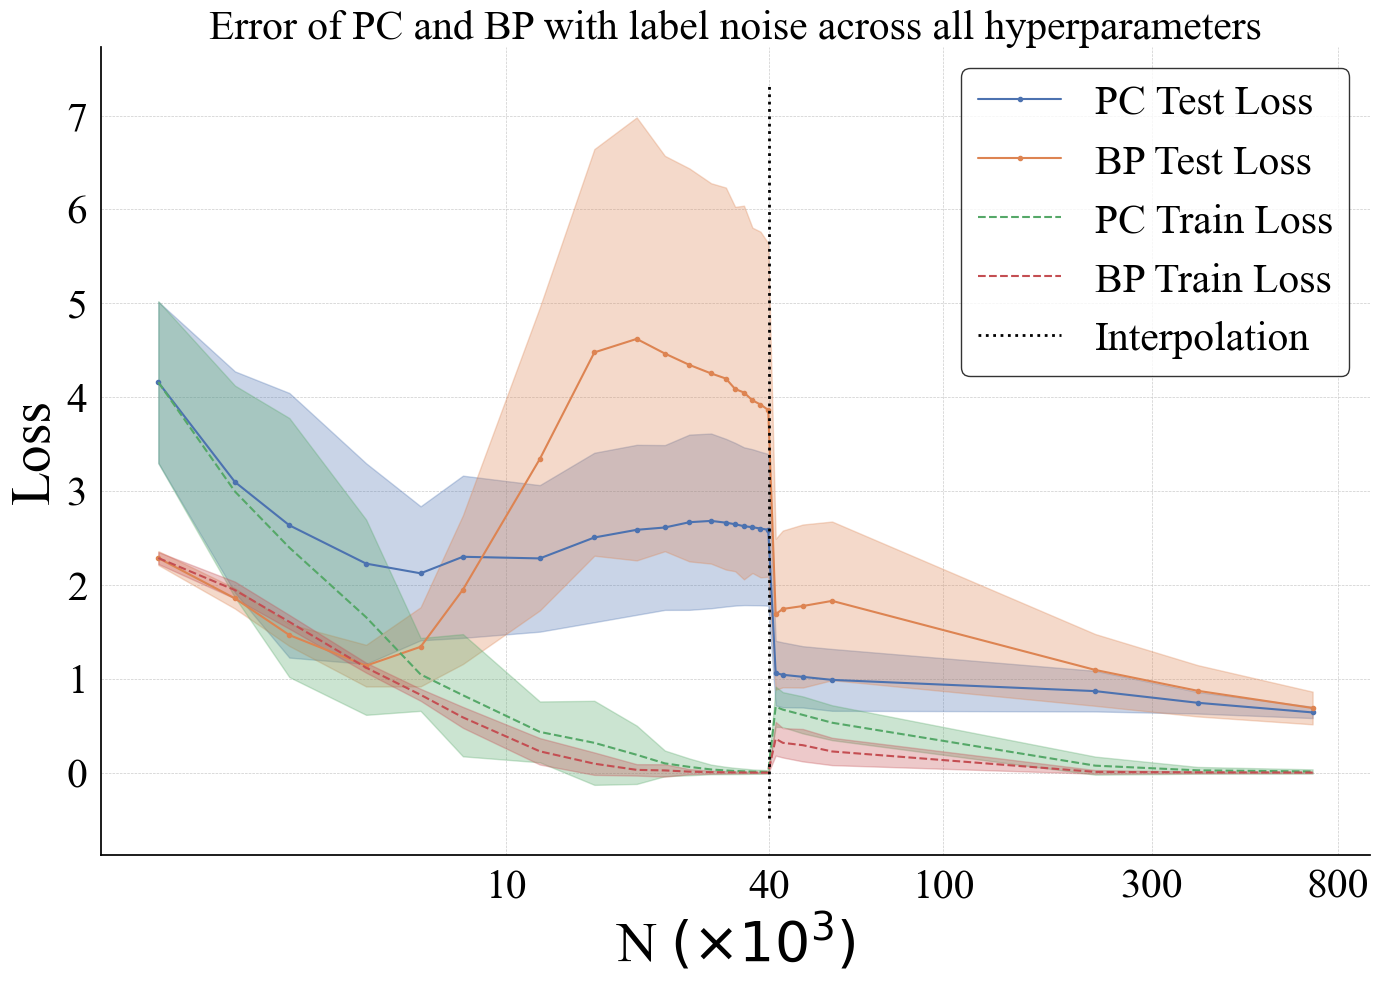

In [69]:
# now create the same plot again but for different noise levels namely 0.2
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def load_losses_from_files(directory, keyword):
    files = [f for f in os.listdir(directory) if keyword in f and f.endswith('.json') and not (f.startswith("epochs_1000_") or f.startswith("epochs_500_"))]
    all_test_losses = {}
    all_train_losses = {}

    for file in files:
        with open(os.path.join(directory, file), 'r') as f:
            data = json.load(f)
            for model_size, test_loss in data["Test losses"].items():
                if model_size not in all_test_losses:
                    all_test_losses[model_size] = []
                all_test_losses[model_size].append(test_loss)

            for model_size, train_loss_list in data["Train losses"].items():
                if model_size not in all_train_losses:
                    all_train_losses[model_size] = []
                all_train_losses[model_size].append(train_loss_list[-1])

    return all_test_losses, all_train_losses

def compute_mean_and_std(losses):
    mean_losses = {}
    std_losses = {}

    for model_size, loss_list in losses.items():
        mean_losses[model_size] = np.mean(loss_list)
        std_losses[model_size] = np.std(loss_list)

    return mean_losses, std_losses

def plot_losses(mean_losses_pc, std_losses_pc, mean_losses_bp, std_losses_bp, mean_train_losses_pc, std_train_losses_pc, mean_train_losses_bp, std_train_losses_bp):
    model_sizes_pc = sorted(mean_losses_pc.keys(), key=int)
    model_sizes_bp = sorted(mean_losses_bp.keys(), key=int)

    mean_test_pc = [mean_losses_pc[size] for size in model_sizes_pc]
    std_test_pc = [std_losses_pc[size] for size in model_sizes_pc]

    mean_test_bp = [mean_losses_bp[size] for size in model_sizes_bp]
    std_test_bp = [std_losses_bp[size] for size in model_sizes_bp]

    mean_train_pc = [mean_train_losses_pc[size] for size in model_sizes_pc]
    std_train_pc = [std_train_losses_pc[size] for size in model_sizes_pc]

    mean_train_bp = [mean_train_losses_bp[size] for size in model_sizes_bp]
    std_train_bp = [std_train_losses_bp[size] for size in model_sizes_bp]

    sizes_pc = [int(size) / 1e3 for size in model_sizes_pc]
    sizes_bp = [int(size) / 1e3 for size in model_sizes_bp]
    interpolation_threshold = 40

    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': ['Times New Roman'],
        'axes.titlesize': 14,
        'axes.labelsize': 12,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'legend.fontsize': 10
    })

    fig, ax = plt.subplots(figsize=(14, 10))

    ax.semilogx(sizes_pc, mean_test_pc, ".-", label="PC Test Loss", color="C0")
    ax.fill_between(sizes_pc, np.array(mean_test_pc) - np.array(std_test_pc), np.array(mean_test_pc) + np.array(std_test_pc), alpha=0.3, color="C0")

    ax.semilogx(sizes_bp, mean_test_bp, ".-", label="BP Test Loss", color="C1")
    ax.fill_between(sizes_bp, np.array(mean_test_bp) - np.array(std_test_bp), np.array(mean_test_bp) + np.array(std_test_bp), alpha=0.3, color="C1")

    ax.semilogx(sizes_pc, mean_train_pc, "--", label="PC Train Loss", color="C2")
    ax.fill_between(sizes_pc, np.array(mean_train_pc) - np.array(std_train_pc), np.array(mean_train_pc) + np.array(std_train_pc), alpha=0.3, color="C2")

    ax.semilogx(sizes_bp, mean_train_bp, "--", label="BP Train Loss", color="C3")
    ax.fill_between(sizes_bp, np.array(mean_train_bp) - np.array(std_train_bp), np.array(mean_train_bp) + np.array(std_train_bp), alpha=0.3, color="C3")

    ax.set_xticks([10, 40, 100, 300, 800], minor=False)
    ax.set_xticks([], minor=True)
    ax.vlines(interpolation_threshold, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], linestyle="dotted", color="black", linewidth=2, label="Interpolation")

    ax.set_facecolor("white")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color("black")
    ax.spines["bottom"].set_color("black")
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.xaxis.get_major_formatter().set_scientific(False)
    ax.xaxis.get_major_formatter().set_useOffset(False)
    ax.tick_params(axis='x', colors="black")
    ax.tick_params(axis='y', colors="black")
    ax.yaxis.label.set_color("black")
    ax.xaxis.label.set_color("black")
    #set size of x and y ticks labels
    ax.xaxis.set_tick_params(labelsize=30)
    ax.yaxis.set_tick_params(labelsize=30)

    plt.xlabel(r"N $(\times 10^3)$", color="black", fontsize=40)
    plt.ylabel("Loss", color="black", fontsize=40)
    plt.title("Error of PC and BP with label noise across all hyperparameters", color="black", fontsize=30)
    legend = ax.legend(frameon=True, fontsize=30, loc='best', edgecolor='black')
    plt.setp(legend.get_texts(), color="black")
    fig.tight_layout()
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)

    # Save the figure
    plt.savefig("test_error_pc_bp_noise_0.2_all_hyperparameters.pdf", dpi=300, bbox_inches='tight')

    plt.show()

# Paths to the directories containing the JSON files
dir_pc = 'data/results_pc/two_layer_nn/CrossEntropyLoss/'
dir_bp = 'data/results_bp/two_layer_nn/CrossEntropyLoss/'

# Load losses from files
test_losses_pc, train_losses_pc = load_losses_from_files(dir_pc, 'noise_0.2')
test_losses_bp, train_losses_bp = load_losses_from_files(dir_bp, 'noise_0.2')

# Compute mean and standard deviation for test losses
mean_test_losses_pc, std_test_losses_pc = compute_mean_and_std(test_losses_pc)
mean_test_losses_bp, std_test_losses_bp = compute_mean_and_std(test_losses_bp)

# Compute mean and standard deviation for train losses
mean_train_losses_pc, std_train_losses_pc = compute_mean_and_std(train_losses_pc)
mean_train_losses_bp, std_train_losses_bp = compute_mean_and_std(train_losses_bp)

# Plot the losses
plot_losses(mean_test_losses_pc, std_test_losses_pc, mean_test_losses_bp, std_test_losses_bp, mean_train_losses_pc, std_train_losses_pc, mean_train_losses_bp, std_train_losses_bp)



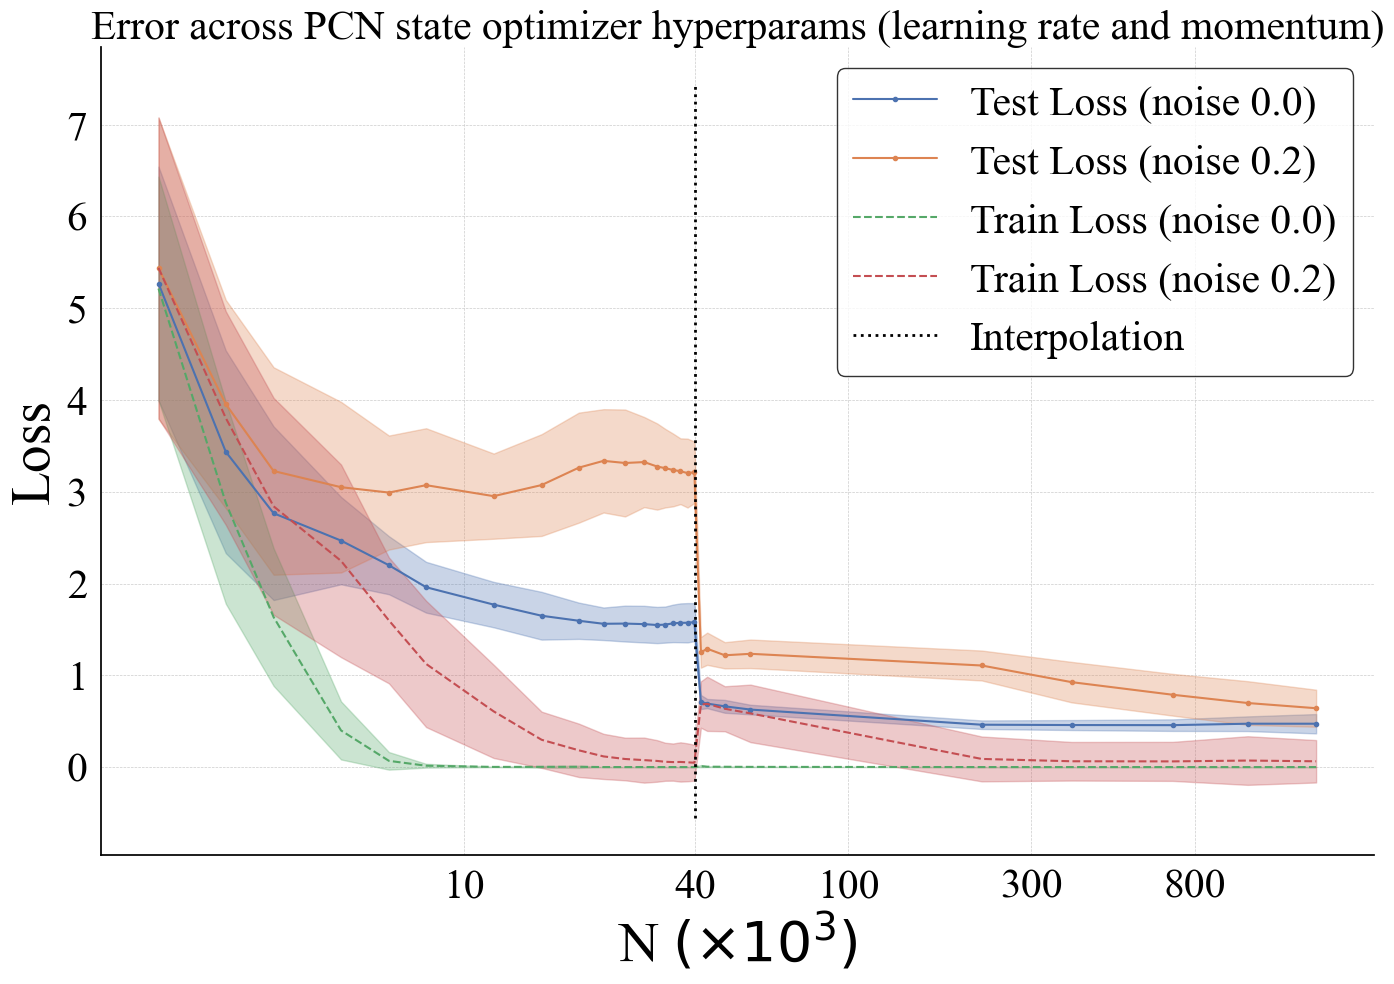

In [68]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def load_losses_from_files(directory, keyword):
    files = [f for f in os.listdir(directory) if keyword in f and f.endswith('.json')]
    all_test_losses = {}
    all_train_losses = {}

    for file in files:
        with open(os.path.join(directory, file), 'r') as f:
            data = json.load(f)
            for model_size, test_loss in data["Test losses"].items():
                if model_size not in all_test_losses:
                    all_test_losses[model_size] = []
                all_test_losses[model_size].append(test_loss)

            for model_size, train_loss_list in data["Train losses"].items():
                if model_size not in all_train_losses:
                    all_train_losses[model_size] = []
                all_train_losses[model_size].append(train_loss_list[-1])

    return all_test_losses, all_train_losses

def compute_mean_and_std(losses):
    mean_losses = {}
    std_losses = {}

    for model_size, loss_list in losses.items():
        mean_losses[model_size] = np.mean(loss_list)
        std_losses[model_size] = np.std(loss_list)

    return mean_losses, std_losses

def plot_losses(mean_losses_noise_0, std_losses_noise_0, mean_losses_noise_2, std_losses_noise_2, mean_train_losses_noise_0, std_train_losses_noise_0, mean_train_losses_noise_2, std_train_losses_noise_2):
    model_sizes_noise_0 = sorted(mean_losses_noise_0.keys(), key=int)
    model_sizes_noise_2 = sorted(mean_losses_noise_2.keys(), key=int)

    mean_test_noise_0 = [mean_losses_noise_0[size] for size in model_sizes_noise_0]
    std_test_noise_0 = [std_losses_noise_0[size] for size in model_sizes_noise_0]

    mean_test_noise_2 = [mean_losses_noise_2[size] for size in model_sizes_noise_2]
    std_test_noise_2 = [std_losses_noise_2[size] for size in model_sizes_noise_2]

    mean_train_noise_0 = [mean_train_losses_noise_0[size] for size in model_sizes_noise_0]
    std_train_noise_0 = [std_train_losses_noise_0[size] for size in model_sizes_noise_0]

    mean_train_noise_2 = [mean_train_losses_noise_2[size] for size in model_sizes_noise_2]
    std_train_noise_2 = [std_train_losses_noise_2[size] for size in model_sizes_noise_2]

    sizes_noise_0 = [int(size) / 1e3 for size in model_sizes_noise_0]
    sizes_noise_2 = [int(size) / 1e3 for size in model_sizes_noise_2]
    interpolation_threshold = 40

    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': ['Times New Roman'],
        'axes.titlesize': 14,
        'axes.labelsize': 12,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'legend.fontsize': 12
    })

    fig, ax = plt.subplots(figsize=(14, 10))

    ax.semilogx(sizes_noise_0, mean_test_noise_0, ".-", label="Test Loss (noise 0.0)", color="C0")
    ax.fill_between(sizes_noise_0, np.array(mean_test_noise_0) - np.array(std_test_noise_0), np.array(mean_test_noise_0) + np.array(std_test_noise_0), alpha=0.3, color="C0")

    ax.semilogx(sizes_noise_2, mean_test_noise_2, ".-", label="Test Loss (noise 0.2)", color="C1")
    ax.fill_between(sizes_noise_2, np.array(mean_test_noise_2) - np.array(std_test_noise_2), np.array(mean_test_noise_2) + np.array(std_test_noise_2), alpha=0.3, color="C1")

    ax.semilogx(sizes_noise_0, mean_train_noise_0, "--", label="Train Loss (noise 0.0)", color="C2")
    ax.fill_between(sizes_noise_0, np.array(mean_train_noise_0) - np.array(std_train_noise_0), np.array(mean_train_noise_0) + np.array(std_train_noise_0), alpha=0.3, color="C2")

    ax.semilogx(sizes_noise_2, mean_train_noise_2, "--", label="Train Loss (noise 0.2)", color="C3")
    ax.fill_between(sizes_noise_2, np.array(mean_train_noise_2) - np.array(std_train_noise_2), np.array(mean_train_noise_2) + np.array(std_train_noise_2), alpha=0.3, color="C3")

    ax.set_xticks([10, 40, 100, 300, 800], minor=False)
    ax.set_xticks([], minor=True)
    ax.vlines(interpolation_threshold, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], linestyle="dotted", color="black", linewidth=2, label="Interpolation")

    ax.set_facecolor("white")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color("black")
    ax.spines["bottom"].set_color("black")
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.xaxis.get_major_formatter().set_scientific(False)
    ax.xaxis.get_major_formatter().set_useOffset(False)
    ax.tick_params(axis='x', colors="black")
    ax.tick_params(axis='y', colors="black")
    ax.yaxis.label.set_color("black")
    ax.xaxis.label.set_color("black")
    #set size of x and y ticks labels
    ax.xaxis.set_tick_params(labelsize=30)
    ax.yaxis.set_tick_params(labelsize=30)

    plt.xlabel(r"N $(\times 10^3)$", color="black", fontsize=40)
    plt.ylabel("Loss", color="black", fontsize=40)
    plt.title("Error across PCN state optimizer hyperparams (learning rate and momentum)", color="black", fontsize=30)
    legend = ax.legend(frameon=True, fontsize=30, loc='best', edgecolor='black')
    plt.setp(legend.get_texts(), color="black")
    fig.tight_layout()
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)

    # Save the figure
    plt.savefig("test_error_pc_hparams_analysis.pdf", dpi=300, bbox_inches='tight')
    
    plt.show()

# Path to the directory containing the JSON files
dir_pc = 'data/results_hparams_pc/two_layer_nn/CrossEntropyLoss'

# Load losses from files
test_losses_noise_0, train_losses_noise_0 = load_losses_from_files(dir_pc, 'noise_0.0')
test_losses_noise_2, train_losses_noise_2 = load_losses_from_files(dir_pc, 'noise_0.2')

# Compute mean and standard deviation for test losses
mean_test_losses_noise_0, std_test_losses_noise_0 = compute_mean_and_std(test_losses_noise_0)
mean_test_losses_noise_2, std_test_losses_noise_2 = compute_mean_and_std(test_losses_noise_2)

# Compute mean and standard deviation for train losses
mean_train_losses_noise_0, std_train_losses_noise_0 = compute_mean_and_std(train_losses_noise_0)
mean_train_losses_noise_2, std_train_losses_noise_2 = compute_mean_and_std(train_losses_noise_2)

# Plot the losses
plot_losses(mean_test_losses_noise_0, std_test_losses_noise_0, mean_test_losses_noise_2, std_test_losses_noise_2, mean_train_losses_noise_0, std_train_losses_noise_0, mean_train_losses_noise_2, std_train_losses_noise_2)


/tmp/ipykernel_3130990/2658534230.py:84: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  fig.tight_layout()


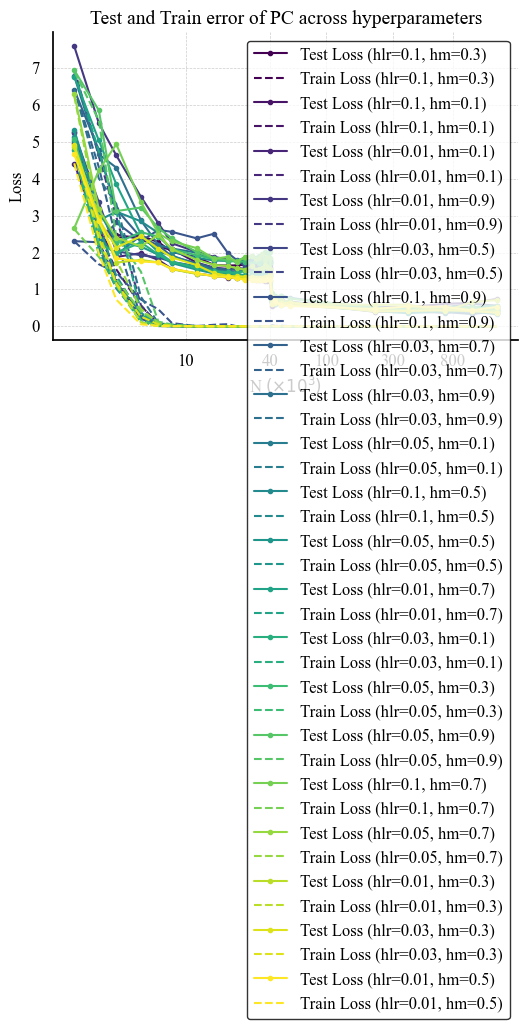

In [13]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def load_losses_from_files(directory, keyword):
    files = [f for f in os.listdir(directory) if keyword in f and f.endswith('.json')]
    all_test_losses = {}
    all_train_losses = {}
    hlr_hm_pairs = {}

    for file in files:
        hlr, hm = extract_params_from_filename(file)
        with open(os.path.join(directory, file), 'r') as f:
            data = json.load(f)
            for model_size, test_loss in data["Test losses"].items():
                if (hlr, hm) not in all_test_losses:
                    all_test_losses[(hlr, hm)] = {}
                if model_size not in all_test_losses[(hlr, hm)]:
                    all_test_losses[(hlr, hm)][model_size] = []
                all_test_losses[(hlr, hm)][model_size].append(test_loss)

            for model_size, train_loss_list in data["Train losses"].items():
                if (hlr, hm) not in all_train_losses:
                    all_train_losses[(hlr, hm)] = {}
                if model_size not in all_train_losses[(hlr, hm)]:
                    all_train_losses[(hlr, hm)][model_size] = []
                all_train_losses[(hlr, hm)][model_size].append(train_loss_list[-1])

        hlr_hm_pairs[(hlr, hm)] = file

    return all_test_losses, all_train_losses, hlr_hm_pairs

def extract_params_from_filename(filename):
    params = filename.split('_')
    hlr = float(params[7])
    hm = float(params[9])
    return hlr, hm

def plot_individual_curves(all_test_losses, all_train_losses, hlr_hm_pairs, keyword):
    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': ['Times New Roman'],
        'axes.titlesize': 14,
        'axes.labelsize': 12,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'legend.fontsize': 12
    })

    fig, ax = plt.subplots(figsize=(6, 4))
    colors = plt.cm.viridis(np.linspace(0, 1, len(hlr_hm_pairs)))

    for idx, ((hlr, hm), filename) in enumerate(hlr_hm_pairs.items()):
        model_sizes = sorted(all_test_losses[(hlr, hm)].keys(), key=int)
        test_losses = [np.mean(all_test_losses[(hlr, hm)][size]) for size in model_sizes]
        train_losses = [np.mean(all_train_losses[(hlr, hm)][size]) for size in model_sizes]
        sizes = [int(size) / 1e3 for size in model_sizes]

        ax.semilogx(sizes, test_losses, ".-", label=f"Test Loss (hlr={hlr}, hm={hm})", color=colors[idx])
        ax.semilogx(sizes, train_losses, "--", label=f"Train Loss (hlr={hlr}, hm={hm})", color=colors[idx])

    ax.set_xticks([10, 40, 100, 300, 800], minor=False)
    ax.set_xticks([], minor=True)
    ax.set_facecolor("white")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color("black")
    ax.spines["bottom"].set_color("black")
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.xaxis.get_major_formatter().set_scientific(False)
    ax.xaxis.get_major_formatter().set_useOffset(False)
    ax.tick_params(axis='x', colors="black")
    ax.tick_params(axis='y', colors="black")
    ax.yaxis.label.set_color("black")
    ax.xaxis.label.set_color("black")

    plt.xlabel(r"N $(\times 10^3)$", color="black", fontsize=12)
    plt.ylabel("Loss", color="black", fontsize=12)
    plt.title("Test and Train error of PC across hyperparameters", color="black", fontsize=14)
    legend = ax.legend(frameon=True, fontsize=12, loc='best', edgecolor='black')
    plt.setp(legend.get_texts(), color="black")
    fig.tight_layout()
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)
    
    plt.show()

# Path to the directory containing the JSON files
dir_pc = 'data/results_hparams_pc/two_layer_nn/CrossEntropyLoss'

# Load losses from files
all_test_losses, all_train_losses, hlr_hm_pairs = load_losses_from_files(dir_pc, 'noise_0.0')

# Plot the losses
plot_individual_curves(all_test_losses, all_train_losses, hlr_hm_pairs, 'noise_0.0')


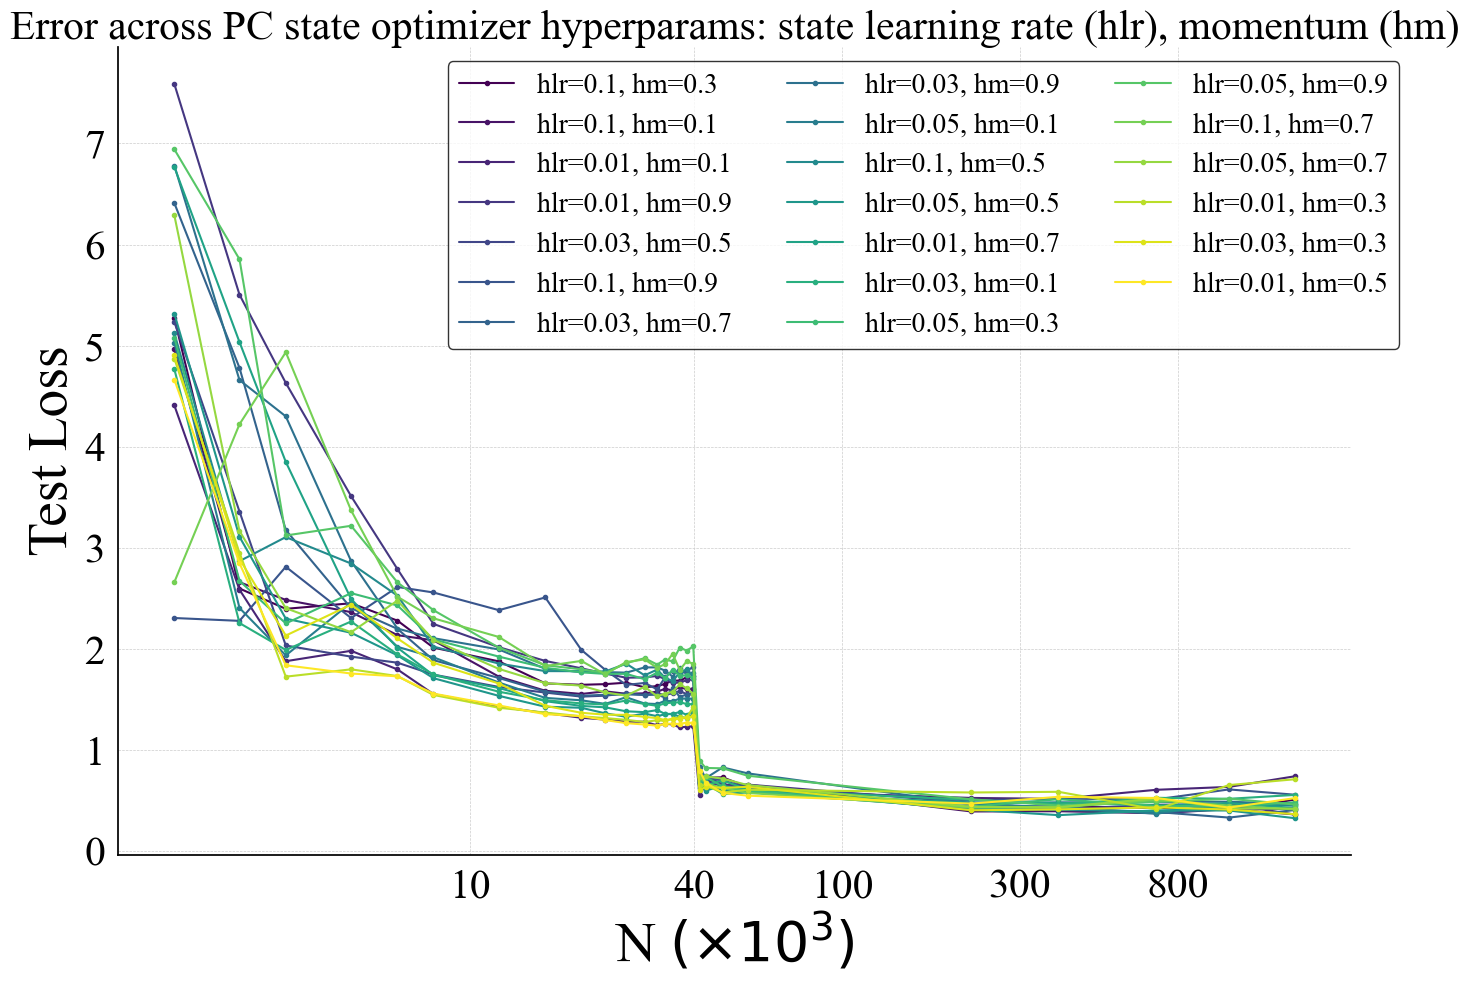

In [57]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def load_losses_from_files(directory, keyword):
    files = [f for f in os.listdir(directory) if keyword in f and f.endswith('.json')]
    all_test_losses = {}
    hlr_hm_pairs = {}

    for file in files:
        hlr, hm = extract_params_from_filename(file)
        with open(os.path.join(directory, file), 'r') as f:
            data = json.load(f)
            for model_size, test_loss in data["Test losses"].items():
                if (hlr, hm) not in all_test_losses:
                    all_test_losses[(hlr, hm)] = {}
                if model_size not in all_test_losses[(hlr, hm)]:
                    all_test_losses[(hlr, hm)][model_size] = []
                all_test_losses[(hlr, hm)][model_size].append(test_loss)

        hlr_hm_pairs[(hlr, hm)] = file

    return all_test_losses, hlr_hm_pairs

def extract_params_from_filename(filename):
    params = filename.split('_')
    hlr = float(params[7])
    hm = float(params[9])
    return hlr, hm

def plot_individual_curves(all_test_losses, hlr_hm_pairs, keyword):
    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': ['Times New Roman'],
        'axes.titlesize': 16,
        'axes.labelsize': 14,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'legend.fontsize': 10
    })

    fig, ax = plt.subplots(figsize=(14, 10))
    colors = plt.cm.viridis(np.linspace(0, 1, len(hlr_hm_pairs)))

    for idx, ((hlr, hm), filename) in enumerate(hlr_hm_pairs.items()):
        model_sizes = sorted(all_test_losses[(hlr, hm)].keys(), key=int)
        test_losses = [np.mean(all_test_losses[(hlr, hm)][size]) for size in model_sizes]
        sizes = [int(size) / 1e3 for size in model_sizes]

        ax.semilogx(sizes, test_losses, ".-", label=f"hlr={hlr}, hm={hm}", color=colors[idx])

    ax.set_xticks([10, 40, 100, 300, 800], minor=False)
    ax.set_xticks([], minor=True)
    ax.set_facecolor("white")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color("black")
    ax.spines["bottom"].set_color("black")
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.xaxis.get_major_formatter().set_scientific(False)
    ax.xaxis.get_major_formatter().set_useOffset(False)
    ax.tick_params(axis='x', colors="black")
    ax.tick_params(axis='y', colors="black")
    ax.yaxis.label.set_color("black")
    ax.xaxis.label.set_color("black")
    #set size of x and y ticks labels
    ax.xaxis.set_tick_params(labelsize=30)
    ax.yaxis.set_tick_params(labelsize=30)

    plt.xlabel(r"N $(\times 10^3)$", color="black", fontsize=40)
    plt.ylabel("Test Loss", color="black", fontsize=40)
    plt.title("Error across PC state optimizer hyperparams: state learning rate (hlr), momentum (hm)", color="black", fontsize=30)
    legend = ax.legend(frameon=True, fontsize=20, loc='upper right', edgecolor='black', ncol=3, bbox_to_anchor=(1.05, 1))
    plt.setp(legend.get_texts(), color="black")
    fig.tight_layout()
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)

    # Save the figure
    plt.savefig("test_error_pc_hparams_analysis_hlr_hm_pairs.pdf", dpi=300, bbox_inches='tight')

    plt.show()

# Path to the directory containing the JSON files
dir_pc = 'data/results_hparams_pc/two_layer_nn/CrossEntropyLoss'

# Load losses from files
all_test_losses, hlr_hm_pairs = load_losses_from_files(dir_pc, 'noise_0.0')

# Plot the losses
plot_individual_curves(all_test_losses, hlr_hm_pairs, 'noise_0.0')


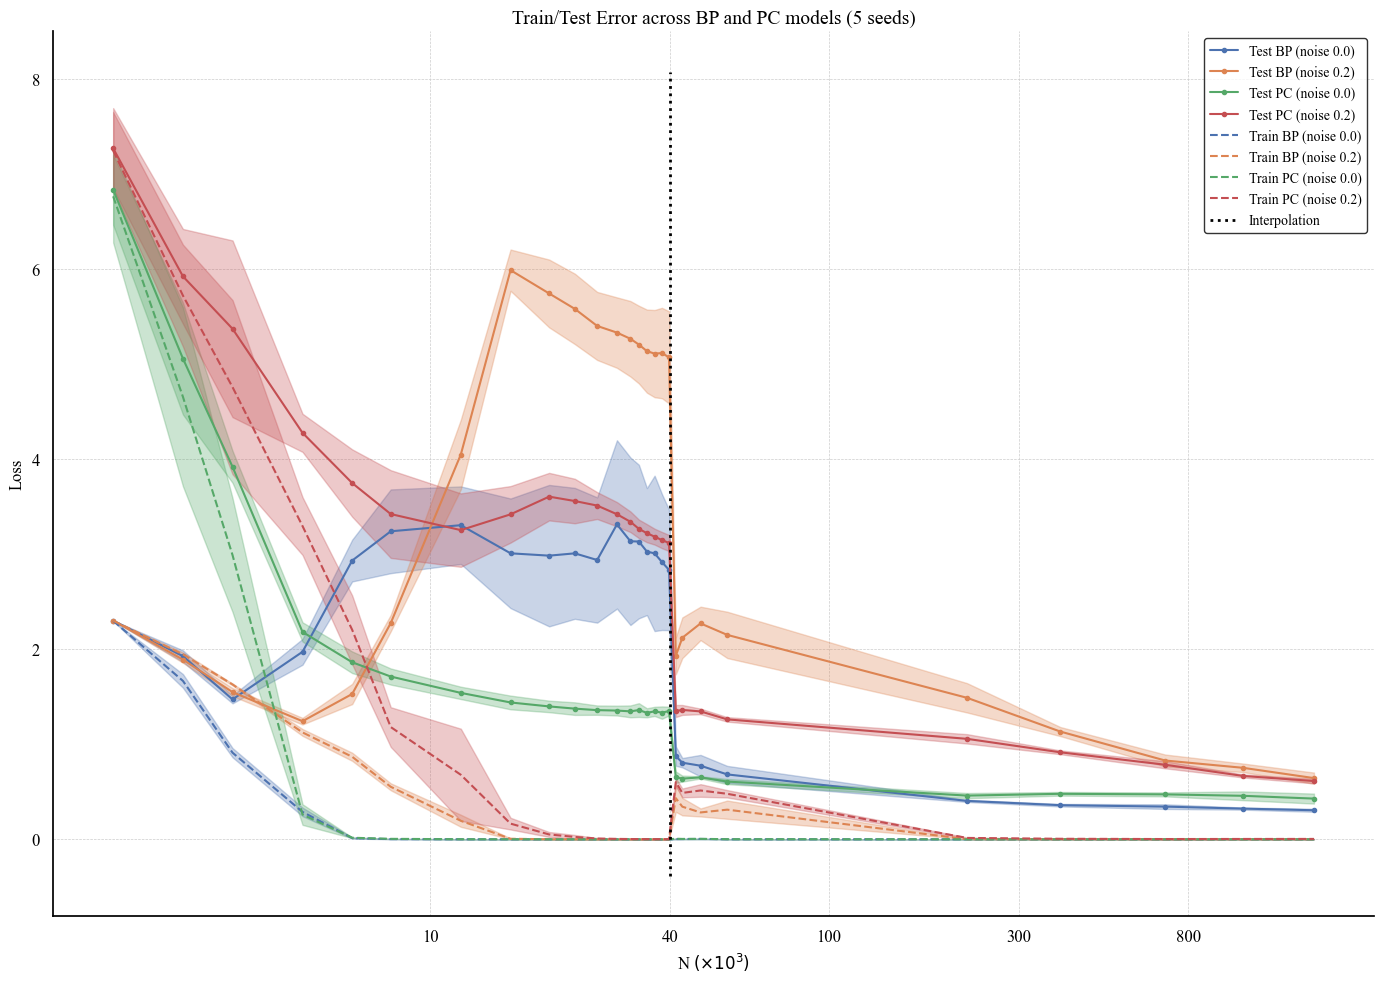

In [38]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def load_losses_from_files(directory, keyword):
    files = [f for f in os.listdir(directory) if keyword in f and f.endswith('.json')]
    all_test_losses = {}
    all_train_losses = {}

    for file in files:
        with open(os.path.join(directory, file), 'r') as f:
            data = json.load(f)
            for model_size, test_loss in data["Test losses"].items():
                if model_size not in all_test_losses:
                    all_test_losses[model_size] = []
                all_test_losses[model_size].append(test_loss)

            for model_size, train_loss_list in data["Train losses"].items():
                if model_size not in all_train_losses:
                    all_train_losses[model_size] = []
                all_train_losses[model_size].append(train_loss_list[-1])

    return all_test_losses, all_train_losses

def compute_mean_and_std(losses):
    mean_losses = {}
    std_losses = {}

    for model_size, loss_list in losses.items():
        mean_losses[model_size] = np.mean(loss_list)
        std_losses[model_size] = np.std(loss_list)

    return mean_losses, std_losses

def plot_all_losses(bp_mean_test_losses_noise_0, bp_std_test_losses_noise_0, 
                    bp_mean_test_losses_noise_2, bp_std_test_losses_noise_2,
                    pc_mean_test_losses_noise_0, pc_std_test_losses_noise_0,
                    pc_mean_test_losses_noise_2, pc_std_test_losses_noise_2,
                    bp_mean_train_losses_noise_0, bp_std_train_losses_noise_0,
                    bp_mean_train_losses_noise_2, bp_std_train_losses_noise_2,
                    pc_mean_train_losses_noise_0, pc_std_train_losses_noise_0,
                    pc_mean_train_losses_noise_2, pc_std_train_losses_noise_2):
    model_sizes_bp = sorted(bp_mean_test_losses_noise_0.keys(), key=int)
    model_sizes_pc = sorted(pc_mean_test_losses_noise_0.keys(), key=int)

    sizes_bp = [int(size) / 1e3 for size in model_sizes_bp]
    sizes_pc = [int(size) / 1e3 for size in model_sizes_pc]
    interpolation_threshold = 40

    # Test losses
    mean_bp_test_noise_0 = [bp_mean_test_losses_noise_0[size] for size in model_sizes_bp]
    std_bp_test_noise_0 = [bp_std_test_losses_noise_0[size] for size in model_sizes_bp]
    mean_bp_test_noise_2 = [bp_mean_test_losses_noise_2[size] for size in model_sizes_bp]
    std_bp_test_noise_2 = [bp_std_test_losses_noise_2[size] for size in model_sizes_bp]
    mean_pc_test_noise_0 = [pc_mean_test_losses_noise_0[size] for size in model_sizes_pc]
    std_pc_test_noise_0 = [pc_std_test_losses_noise_0[size] for size in model_sizes_pc]
    mean_pc_test_noise_2 = [pc_mean_test_losses_noise_2[size] for size in model_sizes_pc]
    std_pc_test_noise_2 = [pc_std_test_losses_noise_2[size] for size in model_sizes_pc]

    # Train losses
    mean_bp_train_noise_0 = [bp_mean_train_losses_noise_0[size] for size in model_sizes_bp]
    std_bp_train_noise_0 = [bp_std_train_losses_noise_0[size] for size in model_sizes_bp]
    mean_bp_train_noise_2 = [bp_mean_train_losses_noise_2[size] for size in model_sizes_bp]
    std_bp_train_noise_2 = [bp_std_train_losses_noise_2[size] for size in model_sizes_bp]
    mean_pc_train_noise_0 = [pc_mean_train_losses_noise_0[size] for size in model_sizes_pc]
    std_pc_train_noise_0 = [pc_std_train_losses_noise_0[size] for size in model_sizes_pc]
    mean_pc_train_noise_2 = [pc_mean_train_losses_noise_2[size] for size in model_sizes_pc]
    std_pc_train_noise_2 = [pc_std_train_losses_noise_2[size] for size in model_sizes_pc]

    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': ['Times New Roman'],
        'axes.titlesize': 14,
        'axes.labelsize': 12,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'legend.fontsize': 12
    })

    fig, ax = plt.subplots(figsize=(14, 10))

    # Plot test losses
    ax.semilogx(sizes_bp, mean_bp_test_noise_0, ".-", label="Test BP (noise 0.0)", color="C0")
    ax.fill_between(sizes_bp, np.array(mean_bp_test_noise_0) - np.array(std_bp_test_noise_0), np.array(mean_bp_test_noise_0) + np.array(std_bp_test_noise_0), alpha=0.3, color="C0")
    
    ax.semilogx(sizes_bp, mean_bp_test_noise_2, ".-", label="Test BP (noise 0.2)", color="C1")
    ax.fill_between(sizes_bp, np.array(mean_bp_test_noise_2) - np.array(std_bp_test_noise_2), np.array(mean_bp_test_noise_2) + np.array(std_bp_test_noise_2), alpha=0.3, color="C1")
    
    ax.semilogx(sizes_pc, mean_pc_test_noise_0, ".-", label="Test PC (noise 0.0)", color="C2")
    ax.fill_between(sizes_pc, np.array(mean_pc_test_noise_0) - np.array(std_pc_test_noise_0), np.array(mean_pc_test_noise_0) + np.array(std_pc_test_noise_0), alpha=0.3, color="C2")
    
    ax.semilogx(sizes_pc, mean_pc_test_noise_2, ".-", label="Test PC (noise 0.2)", color="C3")
    ax.fill_between(sizes_pc, np.array(mean_pc_test_noise_2) - np.array(std_pc_test_noise_2), np.array(mean_pc_test_noise_2) + np.array(std_pc_test_noise_2), alpha=0.3, color="C3")

    # Plot train losses
    ax.semilogx(sizes_bp, mean_bp_train_noise_0, "--", label="Train BP (noise 0.0)", color="C0")
    ax.fill_between(sizes_bp, np.array(mean_bp_train_noise_0) - np.array(std_bp_train_noise_0), np.array(mean_bp_train_noise_0) + np.array(std_bp_train_noise_0), alpha=0.3, color="C0")
    
    ax.semilogx(sizes_bp, mean_bp_train_noise_2, "--", label="Train BP (noise 0.2)", color="C1")
    ax.fill_between(sizes_bp, np.array(mean_bp_train_noise_2) - np.array(std_bp_train_noise_2), np.array(mean_bp_train_noise_2) + np.array(std_bp_train_noise_2), alpha=0.3, color="C1")
    
    ax.semilogx(sizes_pc, mean_pc_train_noise_0, "--", label="Train PC (noise 0.0)", color="C2")
    ax.fill_between(sizes_pc, np.array(mean_pc_train_noise_0) - np.array(std_pc_train_noise_0), np.array(mean_pc_train_noise_0) + np.array(std_pc_train_noise_0), alpha=0.3, color="C2")
    
    ax.semilogx(sizes_pc, mean_pc_train_noise_2, "--", label="Train PC (noise 0.2)", color="C3")
    ax.fill_between(sizes_pc, np.array(mean_pc_train_noise_2) - np.array(std_pc_train_noise_2), np.array(mean_pc_train_noise_2) + np.array(std_pc_train_noise_2), alpha=0.3, color="C3")

    ax.set_xticks([10, 40, 100, 300, 800], minor=False)
    ax.set_xticks([], minor=True)
    ax.vlines(interpolation_threshold, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], linestyle="dotted", color="black", linewidth=2, label="Interpolation")

    ax.set_facecolor("white")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color("black")
    ax.spines["bottom"].set_color("black")
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.xaxis.get_major_formatter().set_scientific(False)
    ax.xaxis.get_major_formatter().set_useOffset(False)
    ax.tick_params(axis='x', colors="black")
    ax.tick_params(axis='y', colors="black")
    ax.yaxis.label.set_color("black")
    ax.xaxis.label.set_color("black")

    plt.xlabel(r"N $(\times 10^3)$", color="black", fontsize=12)
    plt.ylabel("Loss", color="black", fontsize=12)
    plt.title("Train/Test Error across BP and PC models (5 seeds)", color="black", fontsize=14)
    legend = ax.legend(frameon=True, fontsize=10, loc='upper right', edgecolor='black', ncol=1)
    plt.setp(legend.get_texts(), color="black")
    fig.tight_layout()
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)

    # Save the figure
    plt.savefig("combined_loss_bp_pc.pdf", dpi=300, bbox_inches='tight')
    
    plt.show()

# Paths to the directories containing the JSON files
dir_bp = 'data/results_bp_5runs/two_layer_nn/CrossEntropyLoss'
dir_pc = 'data/results_pc_5runs/two_layer_nn/CrossEntropyLoss'

# Load losses from files for BP and PC models for both noise scenarios
bp_test_losses_noise_0, bp_train_losses_noise_0 = load_losses_from_files(dir_bp, 'noise_0.0')
bp_test_losses_noise_2, bp_train_losses_noise_2 = load_losses_from_files(dir_bp, 'noise_0.2')

pc_test_losses_noise_0, pc_train_losses_noise_0 = load_losses_from_files(dir_pc, 'noise_0.0')
pc_test_losses_noise_2, pc_train_losses_noise_2 = load_losses_from_files(dir_pc, 'noise_0.2')

# Compute mean and standard deviation for test losses for BP and PC models
bp_mean_test_losses_noise_0, bp_std_test_losses_noise_0 = compute_mean_and_std(bp_test_losses_noise_0)
bp_mean_test_losses_noise_2, bp_std_test_losses_noise_2 = compute_mean_and_std(bp_test_losses_noise_2)

pc_mean_test_losses_noise_0, pc_std_test_losses_noise_0 = compute_mean_and_std(pc_test_losses_noise_0)
pc_mean_test_losses_noise_2, pc_std_test_losses_noise_2 = compute_mean_and_std(pc_test_losses_noise_2)

# Compute mean and standard deviation for train losses for BP and PC models
bp_mean_train_losses_noise_0, bp_std_train_losses_noise_0 = compute_mean_and_std(bp_train_losses_noise_0)
bp_mean_train_losses_noise_2, bp_std_train_losses_noise_2 = compute_mean_and_std(bp_train_losses_noise_2)

pc_mean_train_losses_noise_0, pc_std_train_losses_noise_0 = compute_mean_and_std(pc_train_losses_noise_0)
pc_mean_train_losses_noise_2, pc_std_train_losses_noise_2 = compute_mean_and_std(pc_train_losses_noise_2)

# Plot all losses in a single plot
plot_all_losses(bp_mean_test_losses_noise_0, bp_std_test_losses_noise_0, 
                bp_mean_test_losses_noise_2, bp_std_test_losses_noise_2,
                pc_mean_test_losses_noise_0, pc_std_test_losses_noise_0,
                pc_mean_test_losses_noise_2, pc_std_test_losses_noise_2,
                bp_mean_train_losses_noise_0, bp_std_train_losses_noise_0,
                bp_mean_train_losses_noise_2, bp_std_train_losses_noise_2,
                pc_mean_train_losses_noise_0, pc_std_train_losses_noise_0,
                pc_mean_train_losses_noise_2, pc_std_train_losses_noise_2)

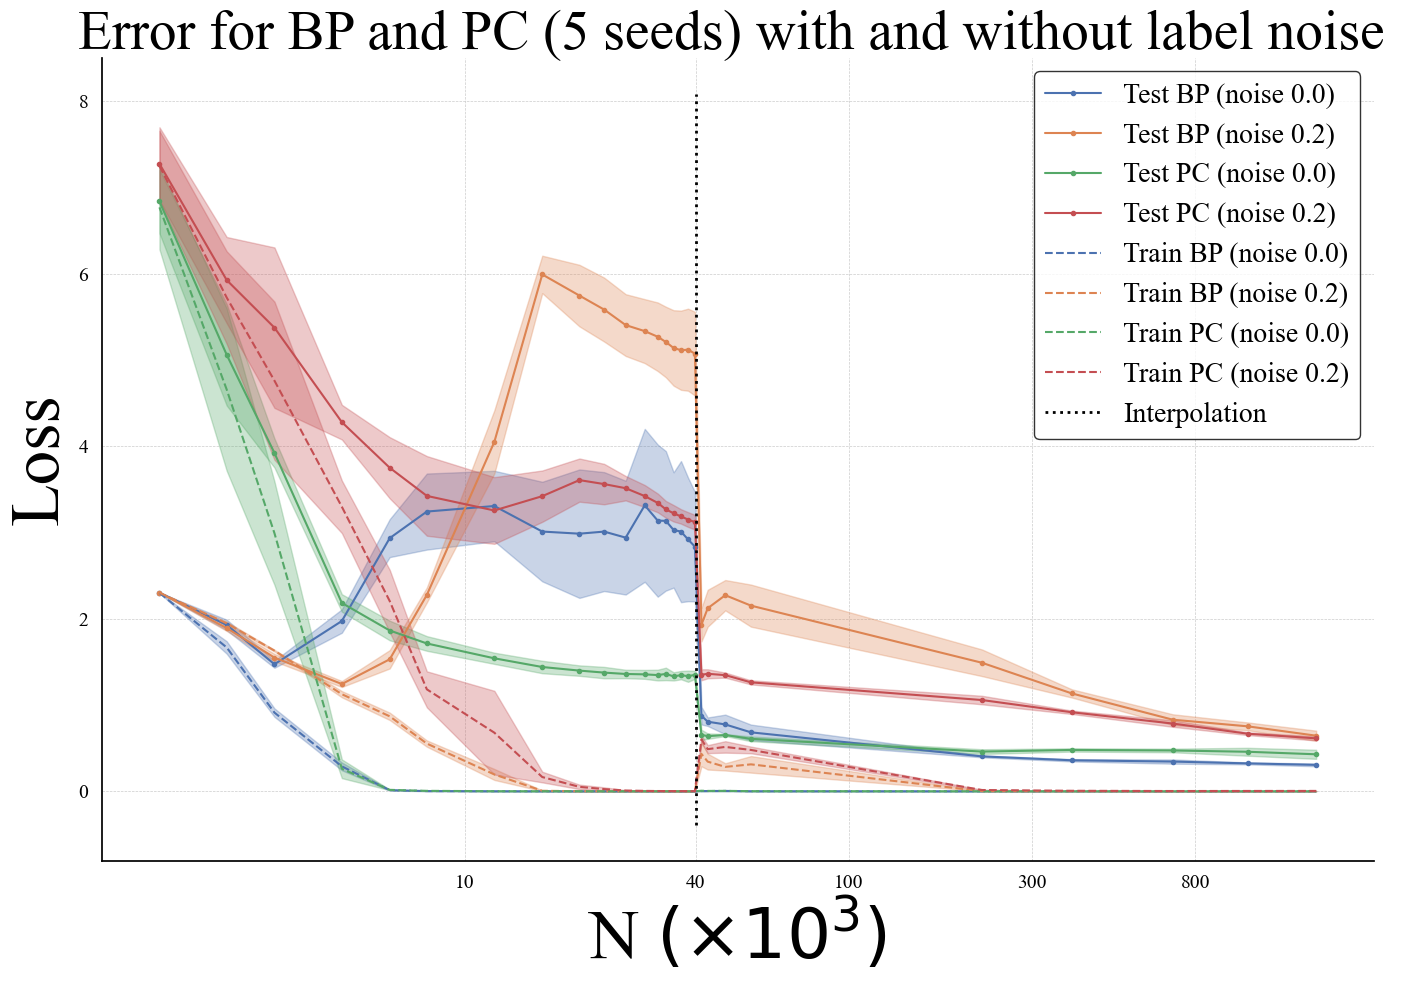

In [71]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def load_losses_from_files(directory, keyword):
    files = [f for f in os.listdir(directory) if keyword in f and f.endswith('.json')]
    all_test_losses = {}
    all_train_losses = {}

    for file in files:
        with open(os.path.join(directory, file), 'r') as f:
            data = json.load(f)
            for model_size, test_loss in data["Test losses"].items():
                if model_size not in all_test_losses:
                    all_test_losses[model_size] = []
                all_test_losses[model_size].append(test_loss)

            for model_size, train_loss_list in data["Train losses"].items():
                if model_size not in all_train_losses:
                    all_train_losses[model_size] = []
                all_train_losses[model_size].append(train_loss_list[-1])

    return all_test_losses, all_train_losses

def compute_mean_and_std(losses):
    mean_losses = {}
    std_losses = {}

    for model_size, loss_list in losses.items():
        mean_losses[model_size] = np.mean(loss_list)
        std_losses[model_size] = np.std(loss_list)

    return mean_losses, std_losses

def plot_all_losses(bp_mean_test_losses_noise_0, bp_std_test_losses_noise_0, 
                    bp_mean_test_losses_noise_2, bp_std_test_losses_noise_2,
                    pc_mean_test_losses_noise_0, pc_std_test_losses_noise_0,
                    pc_mean_test_losses_noise_2, pc_std_test_losses_noise_2,
                    bp_mean_train_losses_noise_0, bp_std_train_losses_noise_0,
                    bp_mean_train_losses_noise_2, bp_std_train_losses_noise_2,
                    pc_mean_train_losses_noise_0, pc_std_train_losses_noise_0,
                    pc_mean_train_losses_noise_2, pc_std_train_losses_noise_2):
    model_sizes_bp = sorted(bp_mean_test_losses_noise_0.keys(), key=int)
    model_sizes_pc = sorted(pc_mean_test_losses_noise_0.keys(), key=int)

    sizes_bp = [int(size) / 1e3 for size in model_sizes_bp]
    sizes_pc = [int(size) / 1e3 for size in model_sizes_pc]
    interpolation_threshold = 40

    # Test losses
    mean_bp_test_noise_0 = [bp_mean_test_losses_noise_0[size] for size in model_sizes_bp]
    std_bp_test_noise_0 = [bp_std_test_losses_noise_0[size] for size in model_sizes_bp]
    mean_bp_test_noise_2 = [bp_mean_test_losses_noise_2[size] for size in model_sizes_bp]
    std_bp_test_noise_2 = [bp_std_test_losses_noise_2[size] for size in model_sizes_bp]
    mean_pc_test_noise_0 = [pc_mean_test_losses_noise_0[size] for size in model_sizes_pc]
    std_pc_test_noise_0 = [pc_std_test_losses_noise_0[size] for size in model_sizes_pc]
    mean_pc_test_noise_2 = [pc_mean_test_losses_noise_2[size] for size in model_sizes_pc]
    std_pc_test_noise_2 = [pc_std_test_losses_noise_2[size] for size in model_sizes_pc]

    # Train losses
    mean_bp_train_noise_0 = [bp_mean_train_losses_noise_0[size] for size in model_sizes_bp]
    std_bp_train_noise_0 = [bp_std_train_losses_noise_0[size] for size in model_sizes_bp]
    mean_bp_train_noise_2 = [bp_mean_train_losses_noise_2[size] for size in model_sizes_bp]
    std_bp_train_noise_2 = [bp_std_train_losses_noise_2[size] for size in model_sizes_bp]
    mean_pc_train_noise_0 = [pc_mean_train_losses_noise_0[size] for size in model_sizes_pc]
    std_pc_train_noise_0 = [pc_std_train_losses_noise_0[size] for size in model_sizes_pc]
    mean_pc_train_noise_2 = [pc_mean_train_losses_noise_2[size] for size in model_sizes_pc]
    std_pc_train_noise_2 = [pc_std_train_losses_noise_2[size] for size in model_sizes_pc]

    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': ['Times New Roman'],
        'axes.titlesize': 16,
        'axes.labelsize': 14,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'legend.fontsize': 12
    })

    fig, ax = plt.subplots(figsize=(14, 10))

    # Plot test losses
    ax.semilogx(sizes_bp, mean_bp_test_noise_0, ".-", label="Test BP (noise 0.0)", color="C0")
    ax.fill_between(sizes_bp, np.array(mean_bp_test_noise_0) - np.array(std_bp_test_noise_0), np.array(mean_bp_test_noise_0) + np.array(std_bp_test_noise_0), alpha=0.3, color="C0")
    
    ax.semilogx(sizes_bp, mean_bp_test_noise_2, ".-", label="Test BP (noise 0.2)", color="C1")
    ax.fill_between(sizes_bp, np.array(mean_bp_test_noise_2) - np.array(std_bp_test_noise_2), np.array(mean_bp_test_noise_2) + np.array(std_bp_test_noise_2), alpha=0.3, color="C1")
    
    ax.semilogx(sizes_pc, mean_pc_test_noise_0, ".-", label="Test PC (noise 0.0)", color="C2")
    ax.fill_between(sizes_pc, np.array(mean_pc_test_noise_0) - np.array(std_pc_test_noise_0), np.array(mean_pc_test_noise_0) + np.array(std_pc_test_noise_0), alpha=0.3, color="C2")
    
    ax.semilogx(sizes_pc, mean_pc_test_noise_2, ".-", label="Test PC (noise 0.2)", color="C3")
    ax.fill_between(sizes_pc, np.array(mean_pc_test_noise_2) - np.array(std_pc_test_noise_2), np.array(mean_pc_test_noise_2) + np.array(std_pc_test_noise_2), alpha=0.3, color="C3")

    # Plot train losses
    ax.semilogx(sizes_bp, mean_bp_train_noise_0, "--", label="Train BP (noise 0.0)", color="C0")
    ax.fill_between(sizes_bp, np.array(mean_bp_train_noise_0) - np.array(std_bp_train_noise_0), np.array(mean_bp_train_noise_0) + np.array(std_bp_train_noise_0), alpha=0.3, color="C0")
    
    ax.semilogx(sizes_bp, mean_bp_train_noise_2, "--", label="Train BP (noise 0.2)", color="C1")
    ax.fill_between(sizes_bp, np.array(mean_bp_train_noise_2) - np.array(std_bp_train_noise_2), np.array(mean_bp_train_noise_2) + np.array(std_bp_train_noise_2), alpha=0.3, color="C1")
    
    ax.semilogx(sizes_pc, mean_pc_train_noise_0, "--", label="Train PC (noise 0.0)", color="C2")
    ax.fill_between(sizes_pc, np.array(mean_pc_train_noise_0) - np.array(std_pc_train_noise_0), np.array(mean_pc_train_noise_0) + np.array(std_pc_train_noise_0), alpha=0.3, color="C2")
    
    ax.semilogx(sizes_pc, mean_pc_train_noise_2, "--", label="Train PC (noise 0.2)", color="C3")
    ax.fill_between(sizes_pc, np.array(mean_pc_train_noise_2) - np.array(std_pc_train_noise_2), np.array(mean_pc_train_noise_2) + np.array(std_pc_train_noise_2), alpha=0.3, color="C3")

    ax.set_xticks([10, 40, 100, 300, 800], minor=False)
    ax.set_xticks([], minor=True)
    ax.vlines(interpolation_threshold, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], linestyle="dotted", color="black", linewidth=2, label="Interpolation")

    ax.set_facecolor("white")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color("black")
    ax.spines["bottom"].set_color("black")
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.xaxis.get_major_formatter().set_scientific(False)
    ax.xaxis.get_major_formatter().set_useOffset(False)
    ax.tick_params(axis='x', colors="black")
    ax.tick_params(axis='y', colors="black")
    ax.yaxis.label.set_color("black")
    ax.xaxis.label.set_color("black")

    plt.xlabel(r"N $(\times 10^3)$", color="black", fontsize=50)
    plt.ylabel("Loss", color="black", fontsize=50)
    plt.title("Error for BP and PC (5 seeds) with and without label noise ", color="black", fontsize=40)
    legend = ax.legend(frameon=True, fontsize=20, loc='upper right', edgecolor='black', ncol=1)
    plt.setp(legend.get_texts(), color="black")
    fig.tight_layout()
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)

    # Save the figure
    plt.savefig("double_descent_bp_pc_5seeds.pdf", dpi=300, bbox_inches='tight')
    
    plt.show()

# Paths to the directories containing the JSON files
dir_bp = 'data/results_bp_5runs/two_layer_nn/CrossEntropyLoss'
dir_pc = 'data/results_pc_5runs/two_layer_nn/CrossEntropyLoss'

# Load losses from files for BP and PC models for both noise scenarios
bp_test_losses_noise_0, bp_train_losses_noise_0 = load_losses_from_files(dir_bp, 'noise_0.0')
bp_test_losses_noise_2, bp_train_losses_noise_2 = load_losses_from_files(dir_bp, 'noise_0.2')

pc_test_losses_noise_0, pc_train_losses_noise_0 = load_losses_from_files(dir_pc, 'noise_0.0')
pc_test_losses_noise_2, pc_train_losses_noise_2 = load_losses_from_files(dir_pc, 'noise_0.2')

# Compute mean and standard deviation for test losses for BP and PC models
bp_mean_test_losses_noise_0, bp_std_test_losses_noise_0 = compute_mean_and_std(bp_test_losses_noise_0)
bp_mean_test_losses_noise_2, bp_std_test_losses_noise_2 = compute_mean_and_std(bp_test_losses_noise_2)

pc_mean_test_losses_noise_0, pc_std_test_losses_noise_0 = compute_mean_and_std(pc_test_losses_noise_0)
pc_mean_test_losses_noise_2, pc_std_test_losses_noise_2 = compute_mean_and_std(pc_test_losses_noise_2)

# Compute mean and standard deviation for train losses for BP and PC models
bp_mean_train_losses_noise_0, bp_std_train_losses_noise_0 = compute_mean_and_std(bp_train_losses_noise_0)
bp_mean_train_losses_noise_2, bp_std_train_losses_noise_2 = compute_mean_and_std(bp_train_losses_noise_2)

pc_mean_train_losses_noise_0, pc_std_train_losses_noise_0 = compute_mean_and_std(pc_train_losses_noise_0)
pc_mean_train_losses_noise_2, pc_std_train_losses_noise_2 = compute_mean_and_std(pc_train_losses_noise_2)

# Plot all losses in a single plot
plot_all_losses(bp_mean_test_losses_noise_0, bp_std_test_losses_noise_0, 
                bp_mean_test_losses_noise_2, bp_std_test_losses_noise_2,
                pc_mean_test_losses_noise_0, pc_std_test_losses_noise_0,
                pc_mean_test_losses_noise_2, pc_std_test_losses_noise_2,
                bp_mean_train_losses_noise_0, bp_std_train_losses_noise_0,
                bp_mean_train_losses_noise_2, bp_std_train_losses_noise_2,
                pc_mean_train_losses_noise_0, pc_std_train_losses_noise_0,
                pc_mean_train_losses_noise_2, pc_std_train_losses_noise_2)
